**Christmas Music Billboards** by Alena Olshevskaya


DATA FOR ANALYSIS: https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-12-24

In [109]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly 
import plotly.express as px
% matplotlib inline

In [199]:
df = pd.read_csv('/content/christmas.csv')
df

,url,weekid,week_position,song,performer,songid,instance,previous_week_position,peak_position,weeks_on_chart,year,month,day
0,http://www.billboard.com/charts/hot-100/1958-1...,12/13/1958,83,RUN RUDOLPH RUN,Chuck Berry,Run Rudolph RunChuck Berry,1,NaN,69,3,1958,12,13
1,http://www.billboard.com/charts/hot-100/1958-1...,12/20/1958,57,JINGLE BELL ROCK,Bobby Helms,Jingle Bell RockBobby Helms,1,NaN,29,19,1958,12,20
2,http://www.billboard.com/charts/hot-100/1958-1...,12/20/1958,73,RUN RUDOLPH RUN,Chuck Berry,Run Rudolph RunChuck Berry,1,83.0,69,3,1958,12,20
3,http://www.billboard.com/charts/hot-100/1958-1...,12/20/1958,86,WHITE CHRISTMAS,Bing Crosby,White ChristmasBing Crosby,1,NaN,12,13,1958,12,20
4,http://www.billboard.com/charts/hot-100/1958-1...,12/27/1958,44,GREEN CHRI$TMA$,Stan Freberg,Green Chri$tma$Stan Freberg,1,NaN,44,2,1958,12,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,http://www.billboard.com/charts/hot-100/2017-0...,1/7/2017,16,ALL I WANT FOR CHRISTMAS IS YOU,Mariah Carey,All I Want For Christmas Is YouMariah Carey,6,20.0,11,19,2017,1,7
383,http://www.billboard.com/charts/hot-100/2017-0...,1/7/2017,27,ROCKIN' AROUND THE CHRISTMAS TREE,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,6,48.0,14,18,2017,1,7
384,http://www.billboard.com/charts/hot-100/2017-0...,1/7/2017,48,IT'S THE MOST WONDERFUL TIME OF THE YEAR,Andy Williams,It's The Most Wonderful Time Of The YearAndy W...,1,NaN,48,1,2017,1,7
385,http://www.billboard.com/charts/hot-100/2017-0...,1/14/2017,35,ALL I WANT FOR CHRISTMAS IS YOU,Mariah Carey,All I Want For Christmas Is YouMariah Carey,6,16.0,11,19,2017,1,14


In [115]:
df.isnull().sum()

url                         0
weekid                      0
week_position               0
song                        0
performer                   0
songid                      0
instance                    0
previous_week_position    108
peak_position               0
weeks_on_chart              0
year                        0
month                       0
day                         0
dtype: int64

In [116]:
df = df.fillna(0)

We need to find out which artists were the most popular in the charts.

Let's count the number of weeks in  charts.

In [117]:
df_numbercharted=df.groupby('performer').sum().sort_values('weeks_on_chart', ascending=False)
df_numbercharted=df_numbercharted.reset_index()
df_numbercharted.head(10)

,performer,week_position,instance,previous_week_position,peak_position,weeks_on_chart,year,month,day
0,Bobby Helms,1073,64,802.0,580,380,39433,185,340
1,Mariah Carey,650,79,339.0,309,362,40275,141,317
2,Brenda Lee,935,60,709.0,266,342,37642,173,335
3,Goo Goo Dolls,823,13,847.0,468,260,26069,108,217
4,David Seville And The Chipmunks,918,39,725.0,624,240,31370,159,268
5,New Kids On The Block,315,12,280.0,84,192,23872,97,200
6,Bing Crosby,739,50,492.0,276,186,31367,181,315
7,Dan Fogelberg,298,8,284.0,72,144,15845,41,145
8,The Impressions,350,11,307.0,77,121,21609,75,191
9,Merle Haggard,596,10,555.0,280,110,19734,75,161


In [143]:
px.bar(x='performer', y='weeks_on_chart', data_frame=df_numbercharted.head(10), title="Top 10 Artists with Highes Number of Weeks Charted")

The bar shows that the first three performers have a fairly large gap from the rest, but each of the Top 10 performers has been on the charts for more than 100 weeks.

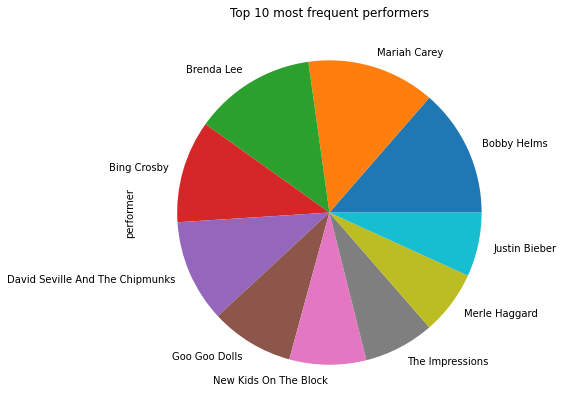

In [135]:
fig = plt.figure(figsize = (7, 7))
ax = fig.subplots()
df.performer.value_counts()[:10].plot(ax=ax, kind = "pie")

ax.set_title("Top 10 most frequent performers")

plt.show()

Dan Fogelberg is not in Top 10 here but  he was more successful on the charts.

With Justin Bieber, the situation is exactly the opposite.

The data shows only three months: November, December and January. Let's look at their statistics and find out which month is most represented in the data.

In [190]:
month=df.groupby('month').sum()
month=month.reset_index()
month['month']

0     1
1    11
2    12
Name: month, dtype: int64

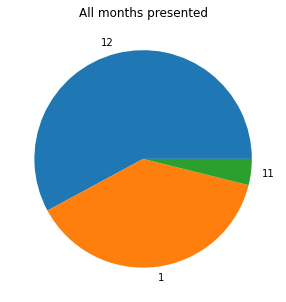

In [253]:
import csv
from collections import Counter

with open('/content/christmas.csv', 'r') as f:
    c = Counter(row[11] for row in csv.reader(f))
dct = c.most_common()
del dct[-1]
mths = [key for key, _ in dct]
howmuch = [value for _, value in dct]

fig = plt.figure(figsize = (5, 5))
ax = fig.subplots()
ax.set_title("All months presented")
ax.pie(howmuch, labels=mths)
plt.show()

And what about days?

In [272]:
with open('/content/christmas.csv', 'r') as f:
    d = Counter(row[12] for row in csv.reader(f))

In [271]:
dct_days = d.most_common()
del dct_days[-1]
days = [key for key, _ in dct_days]
howmuch_days = [value for _, value in dct_days]

px.bar(x=days, y=howmuch_days, title="Top days in charts")

It is expected that December 24 will prevail, because it is Christmas Eve. (Although we counted the dates of all three months)

We can also look at the years presented in the dataset.

Not all years are present there, and based on the graph below, it can be concluded that Christmas songs were most popular in the 1960s and after 2010.

In [99]:
dfyear = df.groupby('year').sum().sort_values('weeks_on_chart', ascending=False)
dfyear=dfyear.reset_index()

In [102]:
px.bar(x='year', y='weeks_on_chart', data_frame=dfyear)

**Let's take a look at the various correlations.**

In [238]:
df=df.fillna('')
df=df.replace(' ', '')

In [239]:
df[['week_position', 'previous_week_position', 'peak_position',
       'weeks_on_chart', 'year', 'month', 'day',
       ]] = df[['week_position', 'previous_week_position', 'peak_position',
       'weeks_on_chart', 'year', 'month', 'day',
       ]].apply(pd.to_numeric)

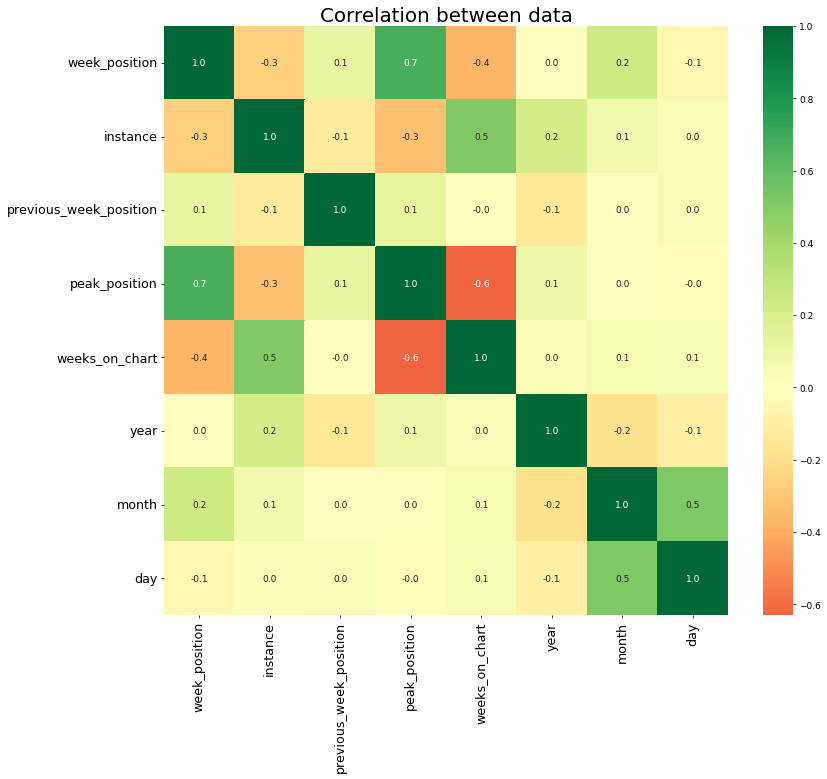

In [132]:
%matplotlib inline
f,ax = plt.subplots(figsize=(14,12), dpi = 65)
sns.heatmap(df.corr(), cmap='RdYlGn', center=0, annot = True, fmt = ".1f", ax = ax)
plt.title('Correlation between data', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

I do not know what instance is in this case and what its correlations are, but it is obvious that there is a relationship between week_position and peak_position.

But for some reason the relationship between week_position and previous_week_position is not so obvious.

We do not take into consideration the relationship between months and days.